## Actividad de clase 2: Características de Datos de entrada
### Eliuth Montiel Navarrete

# CODIFICACIÓN

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelBinarizer, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    "Nivel_educativo": [
        "Primaria", "Secundaria", "Preparatoria", "Universidad", "Preparatoria",
        "Secundaria", "Primaria", "Universidad", "Preparatoria", "Secundaria"
    ],
    "Ciudad": [
        "CDMX", "Guadalajara", "Monterrey", "CDMX", "Guadalajara",
        "Monterrey", "CDMX", "Guadalajara", "Monterrey", "CDMX"
    ],
    "Tiene_coche": [
        "Sí", "No", "Sí", "Sí", "No",
        "Sí", "No", "Sí", "No", "Sí"
    ],
    "Edad": [25, 30, 22, 35, 28, 40, 23, 32, 27, 29]
}

df = pd.DataFrame(data)
df.head()

,Nivel_educativo,Ciudad,Tiene_coche,Edad
0,Primaria,CDMX,Sí,25
1,Secundaria,Guadalajara,No,30
2,Preparatoria,Monterrey,Sí,22
3,Universidad,CDMX,Sí,35
4,Preparatoria,Guadalajara,No,28


In [3]:
#@daredliuth
# Codificación jerárquica para la variable "Nivel_educativo".
ord_cat = ["Primaria","Secundaria","Preparatoria","Universidad"]
orden_nivel = OrdinalEncoder(categories=[ord_cat])
df["Nivel_educativo"] = orden_nivel.fit_transform(df[["Nivel_educativo"]])

#@daredliuth
#Codificación binaria para "Tiene_coche"
lb = LabelBinarizer()
df["Tiene_coche"] = lb.fit_transform(df["Tiene_coche"])

#@daredliuth
#Codificación One-Hot para "Ciudad"
oneHot = OneHotEncoder(drop = "first", sparse_output = False)
ciudad_codificada = oneHot.fit_transform(df[["Ciudad"]])
df = df.drop(columns=["Ciudad"])
#Nombres de las columnas codificadas.
ciudad_columnas = oneHot.get_feature_names_out(["Ciudad"])
#Agregar las columnas modificadas.
df[ciudad_columnas] = ciudad_codificada

df.head()

,Nivel_educativo,Tiene_coche,Edad,Ciudad_Guadalajara,Ciudad_Monterrey
0,0.0,1,25,0.0,0.0
1,1.0,0,30,1.0,0.0
2,2.0,1,22,0.0,1.0
3,3.0,1,35,0.0,0.0
4,2.0,0,28,1.0,0.0


Variables de tiempo

In [4]:
data = {
    "Fecha": [
        "2025-01-15", "2025-02-20", "2025-03-10", "2025-04-05", "2025-05-25",
        "2025-06-30", "2025-07-15", "2025-08-20", "2025-09-10", "2025-10-31"
    ],
    "Ventas": [100, 150, 200, 180, 220, 250, 270, 300, 230, 190]
}

df = pd.DataFrame(data)
#@daredliuth
df["Fecha"] = pd.to_datetime(df["Fecha"])
df.head()

,Fecha,Ventas
0,2025-01-15,100
1,2025-02-20,150
2,2025-03-10,200
3,2025-04-05,180
4,2025-05-25,220


In [5]:
#@daredliuth
#Extraer el mes, año y día.
df["Mes"] = df["Fecha"].dt.month
df["Año"] = df["Fecha"].dt.year
df["Día"] = df["Fecha"].dt.dayofyear

#Codificación cíclica.
df["Mes_sin"] = np.sin(2 * np.pi * df["Mes"] / 12)
df["Mes_cos"] = np.cos(2 * np.pi * df["Mes"] / 12)

df["Día_sin"] = np.sin(2 * np.pi * df["Día"] / 365)
df["Día_cos"] = np.cos(2 * np.pi * df["Día"] / 365)

df.head()

,Fecha,Ventas,Mes,Año,Día,Mes_sin,Mes_cos,Día_sin,Día_cos
0,2025-01-15,100,1,2025,15,0.500000,8.660254e-01,0.255353,0.966848
1,2025-02-20,150,2,2025,51,0.866025,5.000000e-01,0.769415,0.638749
2,2025-03-10,200,3,2025,69,1.000000,6.123234e-17,0.927542,0.373720
3,2025-04-05,180,4,2025,95,0.866025,-5.000000e-01,0.997917,-0.064508
4,2025-05-25,220,5,2025,145,0.500000,-8.660254e-01,0.601624,-0.798779


[]

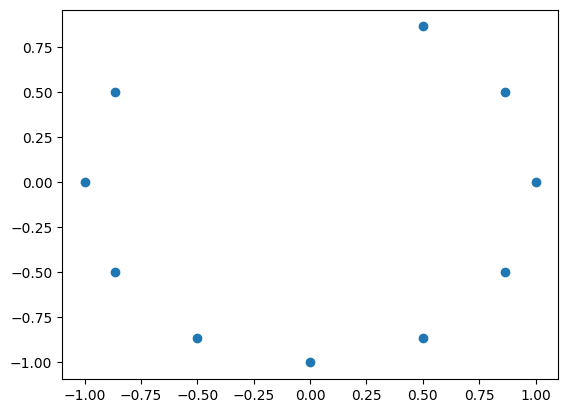

In [6]:
plt.figure()
plt.scatter(df["Mes_sin"],df["Mes_cos"])
plt.plot()

# Distribución y dispersión de los datos

In [7]:
np.random.seed(42)  # Para reproducibilidad

data = {
    "Tienda": np.random.choice(["Norte", "Sur", "Este", "Oeste"], size=100),
    "Categoria": np.random.choice(["Electrónica", "Ropa", "Hogar"], size=100),
    "Ventas": np.random.normal(loc=200, scale=50, size=100).round(2),  # Distribución normal
    "Unidades_vendidas": np.random.poisson(lam=5, size=100)
}

df = pd.DataFrame(data)
print(df.head())

  Tienda Categoria  Ventas  Unidades_vendidas
0   Este     Hogar  125.88                  5
1  Oeste      Ropa  188.56                 10
2  Norte      Ropa  248.13                  4
3   Este      Ropa  189.52                  4
4   Este      Ropa  161.30                  4


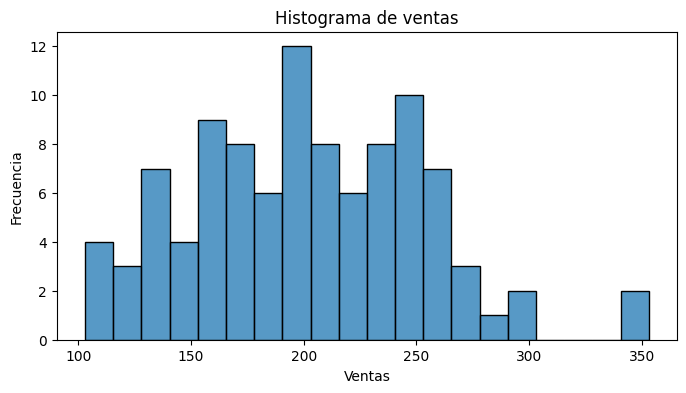

In [8]:
#@daredliuth
#Histograma de ventas

plt.figure(figsize=(8,4))
sns.histplot(df["Ventas"],bins=20)
plt.title("Histograma de ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

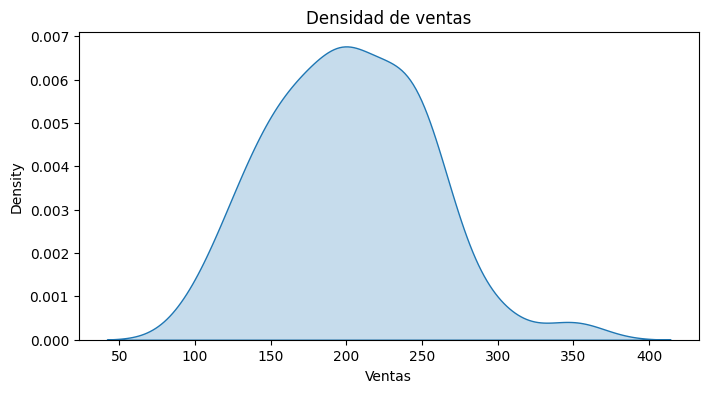

In [9]:
#@daredliuth
#KDE de ventas.
plt.figure(figsize=(8,4))
sns.kdeplot(df["Ventas"], fill=True)
plt.title("Densidad de ventas")
plt.xlabel("Ventas")
plt.show()

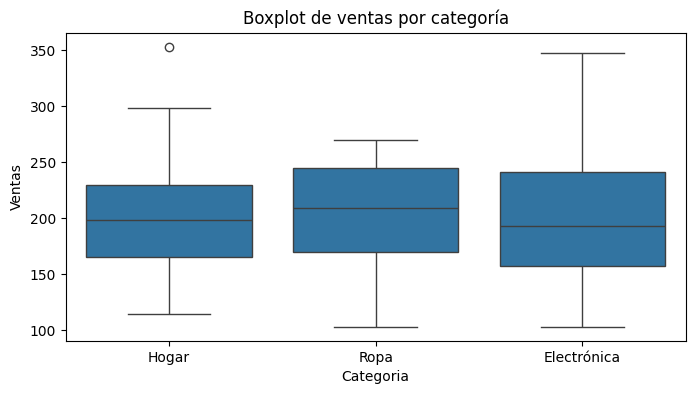

In [10]:
#Boxplot de ventas por categoría.
plt.figure(figsize=(8,4))
sns.boxplot(x="Categoria", y="Ventas", data=df)
plt.title("Boxplot de ventas por categoría")
plt.show()

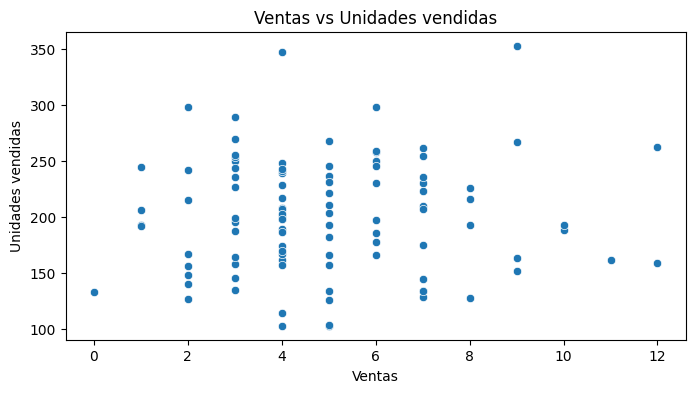

In [11]:
#Gráfico de dispersión
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="Unidades_vendidas", y="Ventas")
plt.title("Ventas vs Unidades vendidas")
plt.xlabel("Ventas")
plt.ylabel("Unidades vendidas")
plt.show()

# Análisis de datos faltantes

In [12]:
data = {
    "Edad": [25, np.nan, 35, 40, 29, 31, np.nan, 28, 50, 45],
    "Ingresos": [50000, 60000, np.nan, 80000, 55000, np.nan, 62000, 70000, 72000, np.nan],
    "Genero": ["Masculino", "Femenino", np.nan, "Masculino", "Femenino", "Masculino", "Femenino", np.nan, "Femenino", "Masculino"],
    "Ciudad": ["CDMX", "Guadalajara", "Monterrey", np.nan, "CDMX", "Guadalajara", "Monterrey", "CDMX", np.nan, "Monterrey"],
    "Compras": [5, 7, 6, 8, np.nan, 4, 3, 7, 5, np.nan]
}

df = pd.DataFrame(data)
df.head()

,Edad,Ingresos,Genero,Ciudad,Compras
0,25.0,50000.0,Masculino,CDMX,5.0
1,NaN,60000.0,Femenino,Guadalajara,7.0
2,35.0,NaN,NaN,Monterrey,6.0
3,40.0,80000.0,Masculino,NaN,8.0
4,29.0,55000.0,Femenino,CDMX,NaN


In [13]:
#@daredliuth
#Porcentaje de valores faltantes.
porcentaje_faltantes = df.isnull().mean() * 100
#IMputar edad con media.
imputer_media = SimpleImputer(strategy="mean")
df["Edad"] = imputer_media.fit_transform(df[["Edad"]])

#Imputar ingresos con mediana
#imputer_mediana = SimpleImputer(strategy="median")
#df["Ingresos"] = imputer_mediana.fit_transform(df[["Ingresos"]])

#Imputar Genero con más frecuente.
imputer_moda = SimpleImputer(strategy="most_frequent")
df["Genero"] = imputer_moda.fit_transform(df[["Genero"]]).ravel()

#Imputar ciudad con constante.
imputer_const = SimpleImputer(strategy="constant", fill_value="CDMX")
df["Ciudad"] = imputer_const.fit_transform(df[["Ciudad"]]).ravel()

#Imputar compras con mediana.
imputer_mediana = SimpleImputer(strategy="median")
df["Compras"] = imputer_mediana.fit_transform(df[["Compras"]])

df.head()

,Edad,Ingresos,Genero,Ciudad,Compras
0,25.000,50000.0,Masculino,CDMX,5.0
1,35.375,60000.0,Femenino,Guadalajara,7.0
2,35.000,NaN,Femenino,Monterrey,6.0
3,40.000,80000.0,Masculino,CDMX,8.0
4,29.000,55000.0,Femenino,CDMX,5.5


In [14]:
#@daredliuth
#Imputación KNN.
knn_imputer = KNNImputer(n_neighbors=3)
df["Ingresos"] = knn_imputer.fit_transform(df[["Compras","Edad"]])[:,[0]]
df.head(10)

,Edad,Ingresos,Genero,Ciudad,Compras
0,25.000,5.0,Masculino,CDMX,5.0
1,35.375,7.0,Femenino,Guadalajara,7.0
2,35.000,6.0,Femenino,Monterrey,6.0
3,40.000,8.0,Masculino,CDMX,8.0
4,29.000,5.5,Femenino,CDMX,5.5
5,31.000,4.0,Masculino,Guadalajara,4.0
6,35.375,3.0,Femenino,Monterrey,3.0
7,28.000,7.0,Femenino,CDMX,7.0
8,50.000,5.0,Femenino,CDMX,5.0
9,45.000,5.5,Masculino,Monterrey,5.5


# Análisis de valores atípicos

In [15]:
np.random.seed(42)

# Datos normales
edad = np.random.normal(30, 5, 100)
ingresos = np.random.normal(50000, 8000, 100)

# Introducir outliers
edad[95:] = [60, 65, 70, 72, 75]
ingresos[95:] = [120000, 150000, 200000, 250000, 300000]

df = pd.DataFrame({
    "Edad": edad,
    "Ingresos": ingresos
})

print(df.tail(10))

         Edad       Ingresos
90  30.485388   46427.880383
91  34.843225   56851.190355
92  26.489735   51712.749953
93  28.361689   40034.089770
94  28.039459   51385.447407
95  60.000000  120000.000000
96  65.000000  150000.000000
97  70.000000  200000.000000
98  72.000000  250000.000000
99  75.000000  300000.000000


In [16]:
#Por métodos estadísticos
def detectar_outliers(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (serie < lower) | (serie > upper)

outliers_edad = df.index[detectar_outliers(df["Edad"])].tolist()
print(outliers_edad)

[74, 95, 96, 97, 98, 99]


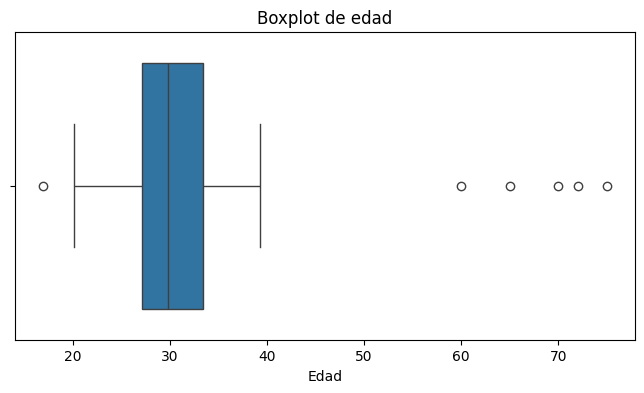

In [17]:
#Visuales
plt.figure(figsize=(8,4))
sns.boxplot(x="Edad", data=df)
plt.title("Boxplot de edad")
plt.show()

In [18]:
#Bosque de isolación (Isolation Forest). xd

iso_for = IsolationForest(contamination=0.05)
outliers_edadIF = df.index[iso_for.fit_predict(df[["Edad"]])]
print(outliers_edadIF)

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 99,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 99, 99, 99,  1, 99],
      dtype='int64')


# Datos personales

In [19]:
data = {
    "Nombre": ["Juan Pérez", "Ana García", "Luis Torres", "Marta López", "Carlos Ruiz"],
    "Edad": [23, 45, 34, 29, 52],
    "Email": ["juanp@gmail.com", "ana_g@hotmail.com", "luis.torres@yahoo.com", "martalopez@gmail.com", "carlosr@outlook.com"],
    "Teléfono": ["555-1234", "555-5678", "555-8765", "555-4321", "555-3456"],
    "Ciudad": ["CDMX", "Monterrey", "Guadalajara", "CDMX", "Puebla"],
    "Salario": [35000, 55000, 42000, 39000, 60000]
}

df = pd.DataFrame(data)

In [20]:
#@daredliuth
#Lista de comprensión.
df["Nombre"] = ["ID_{:03d}".format(i) for i in range(1,len(df) + 1)]

#Enmascarar teléfono.
def enmascarar(telefono):
    return "****-" + telefono[-4:]

df["Teléfono"] = df["Teléfono"].apply(enmascarar)

#Eliminar correo.
df = df.drop(columns=["Email"])

#Generalizar salario.
def salario_gen(salario):
    if salario >= 55000:
        return "Alto"
    elif(salario < 40000):
        return "Bajo"
    else:
        return "Medio"

df["Salario"] = df["Salario"].apply(salario_gen)
df.head()

,Nombre,Edad,Teléfono,Ciudad,Salario
0,ID_001,23,****-1234,CDMX,Bajo
1,ID_002,45,****-5678,Monterrey,Alto
2,ID_003,34,****-8765,Guadalajara,Medio
3,ID_004,29,****-4321,CDMX,Bajo
4,ID_005,52,****-3456,Puebla,Alto


# Normalización y escalado de variables

In [21]:
data = {
    "Edad": [18, 22, 35, 45, 60, 75],               # Rango pequeño
    "Ingresos": [15000, 18000, 35000, 60000, 85000, 120000],  # Rango grande
    "Gastos": [200, 250, 300, 500, 700, 1000]       # Mediano
}

df = pd.DataFrame(data)

In [22]:
#@daredliuth

minmax_scaler = MinMaxScaler()
d = minmax_scaler.fit_transform(df)
df1 = pd.DataFrame(d, columns = df.columns)
df1.head()

,Edad,Ingresos,Gastos
0,0.000000,0.000000,0.0000
1,0.070175,0.028571,0.0625
2,0.298246,0.190476,0.1250
3,0.473684,0.428571,0.3750
4,0.736842,0.666667,0.6250
